# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modeler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [ ]:
!conda config --prepend channels conda-forge
!conda create -n ox --strict-channel-priority osmnx

In [45]:
import osmnx as ox
import networkx as nx

In [18]:
%matplotlib inline
ox.__version__

'1.1.2'

In [19]:
#place boundary for lexington, KY
gdf = ox.geocode_to_gdf("Lexington, Kentucky")
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-84.66042 38.00379, -84.64660 38.000...",38.211404,37.845295,-84.282715,-84.660415,283665899,relation,11078268,38.046407,-84.497039,"Lexington, Fayette County, Kentucky, United St...",boundary,administrative,0.801885


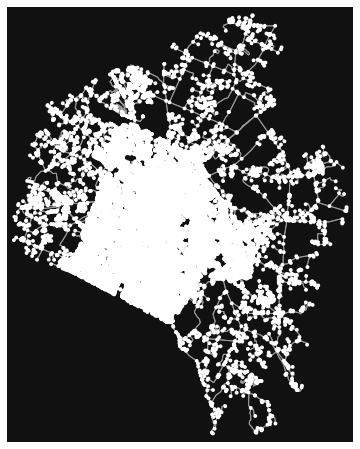

In [41]:
#Question 3: street network for lexington
G = ox.graph_from_place("Lexington, Kentucky, USA", network_type = 'walk')
fig, ax = ox.plot_graph(G)

In [43]:
#Question 4: basic_stats for thr Lexington network
basic_stats = ox.basic_stats(G)
print(basic_stats)

{'n': 40711, 'm': 116534, 'k_avg': 5.724939205620102, 'edge_length_total': 9306319.89800024, 'edge_length_avg': 79.8592676643747, 'streets_per_node_avg': 2.86502419493503, 'streets_per_node_counts': {0: 0, 1: 6992, 2: 0, 3: 25430, 4: 8100, 5: 180, 6: 7, 7: 2}, 'streets_per_node_proportions': {0: 0.0, 1: 0.1717471936331704, 2: 0.0, 3: 0.6246469013288791, 4: 0.19896342511851833, 5: 0.0044214094470781855, 6: 0.0001719437007197072, 7: 4.912677163420206e-05}, 'intersection_count': 33719, 'street_length_total': 4653159.949000007, 'street_segment_count': 58267, 'street_length_avg': 79.85926766437274, 'circuity_avg': 1.1228798362664578, 'self_loop_proportion': 0.01048621003312338}


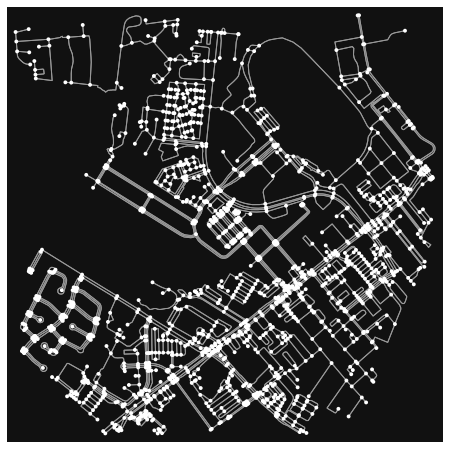

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [42]:
#Question 5
'''
Calculate and show the shortest path from your home (or another point of interest) to UK campus. 
Is this the route you would take? What is the same or different?
'''
#my home address
A = ox.graph_from_address('1035 red mile road, Lexington, Kentucky', network_type='walk')
ox.plot_graph(A)

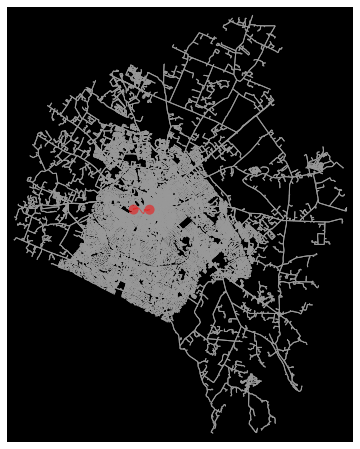

In [69]:
'''
So this code is finding the shortest path by walking from the origin which is my home at 1035 red mile road
to the destination at main building on UK campus making use of their coordinates
'''
orig = ox.distance.nearest_nodes(G, X = -84.5222963, Y = 38.0389007)
dest = ox.distance.nearest_nodes(G, X = -84.5049, Y = 38.0389) 
route = ox.shortest_path(G, orig, dest, weight = 'traveltime')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=1, node_size=0, bgcolor='k')

#this is the route I take to go to school

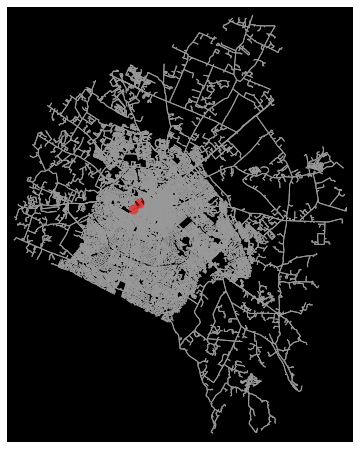

In [70]:
#Question 6: repeat above but for other trips I make
# trip to my friend's house
orig = ox.distance.nearest_nodes(G, X = -84.5222963, Y = 38.0389007)
dest = ox.distance.nearest_nodes(G, X = -84.5153433, Y = 38.0446293)
route = ox.shortest_path(G, orig, dest, weight = 'traveltime')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=1, node_size=0, bgcolor='k')


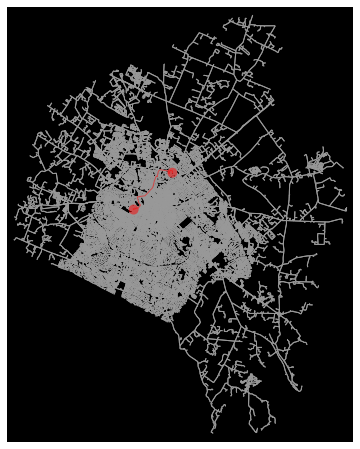

In [71]:
# trip to walmart 
orig = ox.distance.nearest_nodes(G, X = -84.5222963, Y = 38.0389007)
dest = ox.distance.nearest_nodes(G, X = -84.4805156, Y = 38.0699599)
route = ox.shortest_path(G, orig, dest, weight = 'traveltime')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=1, node_size=0, bgcolor='k')

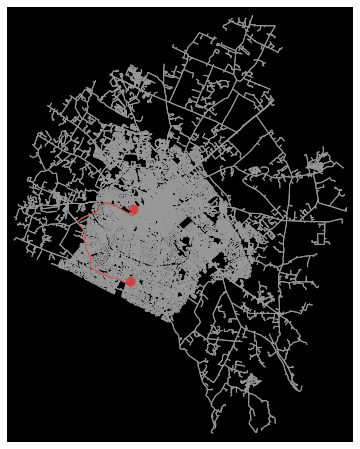

In [72]:
# trip to the summit
orig = ox.distance.nearest_nodes(G, X = -84.5222963, Y = 38.0389007)
dest = ox.distance.nearest_nodes(G, X = -84.5258408, Y = 37.9771080)
route = ox.shortest_path(G, orig, dest, weight = 'traveltime')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=1, node_size=0, bgcolor='k')